# Ques 1 - Part (F) TFIDF Vectorizer

In [1]:
#Importing Data from the CSV file
%matplotlib inline
import string
import math
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectPercentile, chi2

f_train = open("training.1600000.processed.noemoticon.csv", "r", encoding="ISO-8859-1")
X_train = f_train.readlines()
f_test = open("testdata.manual.2009.06.14.csv", "r")
X_test = f_test.readlines()

#Creating the List with just the tweets and finding the number of positive and negative classes. (TRAINING) 
#class_0 = number of classes with label = 0
#class_4 = number of classes with label = 4

class_0=class_4=0
tweets_train =[]
for x in X_train:
    a = x.split('","')
    if (a[0] == '"0'): class_0+=1
    else: class_4+=1
    tweets_train.append('%s"|"%s' % (a[0],a[-1]))

#Creating the List with just the tweets (TEST DATA)
tweets_test =[]
for x in X_test:
    a = x.split('","')
    tweets_test.append('%s"|"%s' % (a[0], a[-1]))
    
print("The length of the training set is = ", len(X_train))
print("The number of classes (label=4) =", class_4)
print("The number of classes (label=0) =", class_0)
print("The length of the test set is = ", len(X_test))

f_test.close()
f_train.close()

m= len(X_train)
phi_0 = class_0/m
phi_4 = class_4/m

The length of the training set is =  1600000
The number of classes (label=4) = 800000
The number of classes (label=0) = 800000
The length of the test set is =  359


#tweets_train_pd = pd.read_pickle('tweet_train_lemma.pkl')
#tweets_test_pd = pd.read_pickle('tweet_test_lemma.pkl')
train_actual_classes = pd.read_pickle('train_class.pkl')
test_actual_classes = pd.read_pickle('test_class.pkl')

## TF-IDF - Multinomial Naive Bayes using Library - 1-grams

In [2]:
tweets_train_pd = pd.Series(tweets_train)
tweets_test_pd = pd.Series(tweets_test)
train_actual_classes = tweets_train_pd.apply(lambda x: (x.split("|")[0]))
test_actual_classes = tweets_test_pd.apply(lambda x: (x.split("|")[0]))
tweets_train_pd = tweets_train_pd.apply(lambda x: x.split("|")[1])
tweets_test_pd = tweets_test_pd.apply(lambda x: x.split("|")[1])


In [3]:
train_classes = train_actual_classes.apply(lambda x: 0 if x=='"0"' else 1)
test_classes = test_actual_classes.apply(lambda x: 0 if x=='"0"' else 1)
all_classes = train_classes.unique()
test_accuracy = []

In [4]:
def classifier(vec, tweets_train, train_classes, phi_0, phi_4, perc):
    start=time.time()
    tfidf_train = vec.fit_transform(tweets_train)
    tfidf_train_new = SelectPercentile(chi2, percentile=perc).fit_transform(tfidf_train, train_classes)
    nb = MultinomialNB(class_prior=[phi_0,phi_4])
    nb.fit(tfidf_train_new, list(train_classes))
    print("\nThe time taken to train the classifier is = {:2.3f}sec".format(time.time()-start))
    return nb

In [6]:
print("\n------------Training a MultiNomial NB using TFIDF Vectorizer--------------------------\n")

print("--------------------Train Model with TFIDF with Unigrams-------------------------------\n")
vec_1 = TfidfVectorizer(analyzer="word", stop_words='english',sublinear_tf=True)

model_1 = classifier(vec_1, tweets_train_pd, train_classes, phi_0, phi_4, 100)
tfidf_test = vec_1.transform(tweets_test_pd)
test_accuracy.append(model_1.score(tfidf_test, test_classes))


------------Training a MultiNomial NB using TFIDF Vectorizer--------------------------

--------------------Train Model with TFIDF with Unigrams-------------------------------


The time taken to train the classifier is = 17.930sec


In [7]:
print("The number of features in this model = {}".format(model_1.feature_count_.shape[1]))
print("The Test Accuracy of the MultinomialNB model trained with TF-IDF unigrams is = {:2.3f}%".format(test_accuracy[0]*100))

The number of features in this model = 683577
The Test Accuracy of the MultinomialNB model trained with TF-IDF unigrams is = 78.552%


## TF-IDF - Multinomial Naive Bayes using Library - bigrams and unigrams together

In [8]:
print("-----------------Train Model with TFIDF with Unigrams+Bigrams---------------------------\n")

vec_2 = TfidfVectorizer(analyzer="word", stop_words='english',sublinear_tf=True, ngram_range=(1,2))
model_2 = classifier(vec_2,tweets_train_pd, train_classes, phi_0, phi_4, 100)

-----------------Train Model with TFIDF with Unigrams+Bigrams---------------------------


The time taken to train the classifier is = 51.028sec


In [9]:
tfidf_test = vec_2.transform(tweets_test_pd)
test_accuracy.append(model_2.score(tfidf_test, test_classes))

In [10]:
print("The number of features in this model = {}".format(model_2.feature_count_.shape[1]))
print("The Test Accuracy of the MultinomialNB model trained with TF-IDF and uni+bigrams is= {:2.3f}%".format(test_accuracy[1]*100))

The number of features in this model = 5477921
The Test Accuracy of the MultinomialNB model trained with TF-IDF and uni+bigrams is= 82.730%


## TF-IDF - Multinomial Naive Bayes using Library - trigrams and unigrams together

In [11]:
print("-----------------Train Model with TFIDF with Unigrams+Trigrams---------------------------\n")

vec_3 = TfidfVectorizer(analyzer="word", stop_words='english',sublinear_tf=True, ngram_range=(1,3))
model_3 = classifier(vec_3,tweets_train_pd, train_classes, phi_0, phi_4, 100)

-----------------Train Model with TFIDF with Unigrams+Trigrams---------------------------


The time taken to train the classifier is = 88.436sec


In [12]:
tfidf_test = vec_3.transform(tweets_test_pd)
test_accuracy.append(model_3.score(tfidf_test, test_classes))


In [13]:
print("The number of features in this model = {}".format(model_3.feature_count_.shape[1]))
print("The Test Accuracy of the MultinomialNB model trained with TF-IDF with uni+trigrams is = {:2.3f}%".format(test_accuracy[2]*100))

The number of features in this model = 12792165
The Test Accuracy of the MultinomialNB model trained with TF-IDF with uni+trigrams is = 82.451%


In [14]:
test_accuracy = [round((x*100),3) for x in test_accuracy]

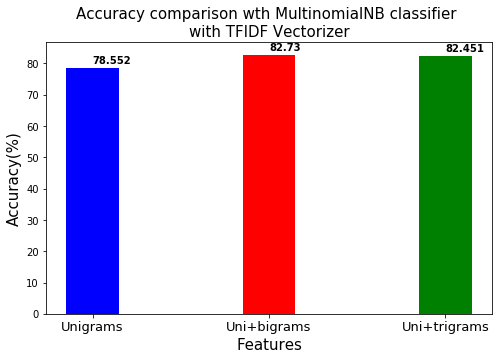

In [20]:
x = range(3)
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.bar(x, test_accuracy, width=0.3, color=['blue', 'red', 'green'])
tech=["Unigrams", "Uni+bigrams", "Uni+trigrams"]
ax.set_xticks(x)
ax.set_xticklabels(tech, fontsize=13)
ax.set_xlabel("Features", fontsize=15)
ax.set_ylabel("Accuracy(%)",  fontsize=15)
ax.set_title("Accuracy comparison wth MultinomialNB classifier \nwith TFIDF Vectorizer", fontsize=15)
for i, v in enumerate(test_accuracy):
    ax.text(i, v+2.5, str(v), color='k', va='center', fontweight='bold')
    
#plt.savefig("Acc_comp_multinom_tfidf.png", dpi=1000, bbox_inches='tight')
plt.show()

## TF-IDF - Multinomial Naive Bayes using Library - using min features and cut features

#### The words that occur in more documents will not contribute to classifying the class. So we clip them using min_df. 

In [5]:
min_df = [0.01, 0.001, 0.0001, 0.00001]
test_acc_mindf =[]
n_features=[]

In [17]:
for i in min_df:
    vec_4 = TfidfVectorizer(analyzer="word", stop_words='english',sublinear_tf=True, min_df=i)
    start = time.time()
    nb = classifier(vec_4,tweets_train_pd, train_classes, phi_0, phi_4, 100)
    end = time.time()
    tfidf_test = vec_4.transform(tweets_test_pd)
    test_acc_mindf.append(nb.score(tfidf_test, test_classes))
    n_features.append(nb.feature_count_.shape[1])
    print("The time taken to train the model for min_df={} is = {:2.3f}sec".format(i,end-start)) 
    print("The number of features in this model for min_df = {} is = {}".format(i, nb.feature_count_.shape[1]))
    


The time taken to train the classifier is = 15.756sec
The time taken to train the model for min_df=0.01 is = 15.756sec
The number of features in this model for min_df = 0.01 is = 81

The time taken to train the classifier is = 15.548sec
The time taken to train the model for min_df=0.001 is = 15.549sec
The number of features in this model for min_df = 0.001 is = 937

The time taken to train the classifier is = 15.367sec
The time taken to train the model for min_df=0.0001 is = 15.368sec
The number of features in this model for min_df = 0.0001 is = 5972

The time taken to train the classifier is = 15.643sec
The time taken to train the model for min_df=1e-05 is = 15.644sec
The number of features in this model for min_df = 1e-05 is = 29485


In [18]:
test_acc_mindf = [round((x*100),3) for x in test_acc_mindf]

In [19]:
print("The Test Accuracy of the MultinomialNB model trained with TF-IDF with min_df values [0.01, 0.001, 0.0001, 0.00001] is = ", [test_acc_mindf[0], test_acc_mindf[1], test_acc_mindf[2], test_acc_mindf[3]])

The Test Accuracy of the MultinomialNB model trained with TF-IDF with min_df values [0.01, 0.001, 0.0001, 0.00001] is =  [62.674, 77.994, 80.78, 81.058]


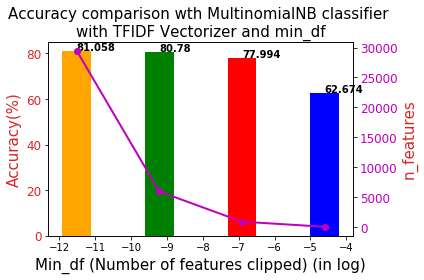

In [22]:
#fig = plt.figure(figsize=(8,5))


fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel("Min_df (Number of features clipped) (in log)", fontsize=15)
ax1.set_ylabel("Accuracy(%)",  fontsize=15, color=color)

ax1.tick_params(axis='y', labelcolor=color, labelsize=12)
ax1.bar(np.log(min_df), test_acc_mindf, width=0.8, color=['blue', 'red', 'green', 'orange'])
for i, (v1, v2) in enumerate(zip(np.log(min_df), test_acc_mindf)):
    ax1.text(v1, v2+1.5, str(v2), color='k', va='center', fontweight='bold')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

#color = 'tab:magenta'

ax2.set_ylabel('n_features', color=color, fontsize=15)  # we already handled the x-label with ax1
ax2.plot(np.log(min_df), n_features, color='m', marker='o', linewidth='2')
ax2.tick_params(axis='y', labelcolor='m', labelsize=12)

plt.title("Accuracy comparison wth MultinomialNB classifier \nwith TFIDF Vectorizer and min_df", fontsize=15)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig("mindf_comp_multinom_tfidf.png", dpi=1000, bbox_inches='tight')

plt.show()

# Using SelectPercentile

In [6]:
test_acc_perc = []
n_features_perc = []
perc = [100, 50.0, 10.0, 5.0, 1.0, 0.8, 0.6, 0.5, 0.1, 0.01]

In [7]:
def classifier_1(tfidf_train, train_classes, phi_0, phi_4, perc):
    start=time.time()
    sel_perc = SelectPercentile(chi2, percentile=perc)
    tfidf_train_new = sel_perc.fit_transform(tfidf_train, train_classes)
    nb = MultinomialNB(class_prior=[phi_0,phi_4])
    nb.fit(tfidf_train_new, list(train_classes))
    print("\nThe time taken to train the classifier is = {:2.3f}sec".format(time.time()-start))
    return nb, sel_perc;

In [10]:
print("\n-------------Training Multinomial NB with SelectPercentile-------------------\n")

vec = TfidfVectorizer(analyzer="word", stop_words='english',sublinear_tf=True, ngram_range=(1,1))
tfidf_train = vec.fit_transform(tweets_train)

for i in range(len(perc)):
    print("Training Multinomial NB for Percentile = {}".format(perc[i]))

    start = time.time()
    nb, sel_perc = classifier_1(tfidf_train, train_classes, phi_0, phi_4, perc[i])
    end = time.time()
    tfidf_test = vec.transform(tweets_test_pd)
    tfidf_test_new = sel_perc.transform(tfidf_test)
    test_acc_perc.append(nb.score(tfidf_test_new, test_classes))
    n_features_perc.append(nb.feature_count_.shape[1])
    print("The time taken to train the model is = {:2.3f}".format(end-start))
    print("The number of features in the trained model is = {}".format(nb.feature_count_.shape[1]))
    print("The Test Accuracy obtained for this model = {:2.3f}%\n\n".format(test_acc_perc[i]*100))


-------------Training Multinomial NB with SelectPercentile-------------------

Training Multinomial NB for Percentile = 100

The time taken to train the classifier is = 2.342sec
The time taken to train the model is = 2.342
The number of features in the trained model is = 684047
The Test Accuracy obtained for this model = 78.552%


Training Multinomial NB for Percentile = 50.0

The time taken to train the classifier is = 2.307sec
The time taken to train the model is = 2.308
The number of features in the trained model is = 342023
The Test Accuracy obtained for this model = 78.552%


Training Multinomial NB for Percentile = 10.0

The time taken to train the classifier is = 2.256sec
The time taken to train the model is = 2.256
The number of features in the trained model is = 68405
The Test Accuracy obtained for this model = 78.552%


Training Multinomial NB for Percentile = 5.0

The time taken to train the classifier is = 2.316sec
The time taken to train the model is = 2.316
The number of

In [26]:
test_acc_perc = [round((x*100),3) for x in test_acc_perc]

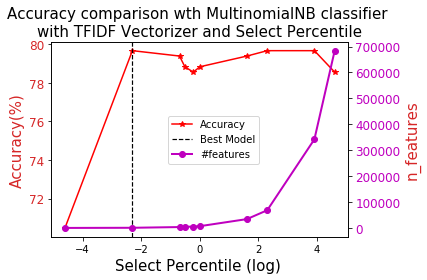

In [31]:
#fig = plt.figure(figsize=(8,5))


fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel("Select Percentile (log) ", fontsize=15)
ax1.set_ylabel("Accuracy(%)",  fontsize=15, color=color)

ax1.tick_params(axis='y', labelcolor=color, labelsize=12)
ax1.plot(np.log(perc), test_acc_perc, marker='*', c='r', label='Accuracy')
# for i, (v1, v2) in enumerate(zip(np.log(perc), test_acc_perc)):
#     ax1.text(v1, v2+1.5, str(round(v2,1)), color='k', va='center', fontweight='bold')
ax1.axvline(np.log(0.1), linestyle='--', c='k', linewidth=1.2, label='Best Model')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

#color = 'tab:magenta'

ax2.set_ylabel('n_features', color=color, fontsize=15)  # we already handled the x-label with ax1
ax2.plot(np.log(perc), n_features_perc, color='m', marker='o', linewidth='2', label='#features')
ax2.tick_params(axis='y', labelcolor='m', labelsize=12)

plt.title("Accuracy comparison wth MultinomialNB classifier \nwith TFIDF Vectorizer and Select Percentile", fontsize=15)
fig.legend(loc=10)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig("selectPerc_comp_multinom_tfidf.png", dpi=1000, bbox_inches='tight')
plt.show()